In [1]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [2]:
parameters = np.load('parameters.npz')
U = parameters.get('U')
bu = parameters.get('bu')
V = parameters.get('V')
bv = parameters.get('bv')
W = parameters.get('W')
bw = parameters.get('bw')


In [3]:
import numpy as np

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    exp_x = np.exp(x - np.max(x))  # Subtracting the maximum value for numerical stability
    return exp_x / exp_x.sum(axis=0)



In [4]:
char_arr = np.array(['l','e','a','r','n']).reshape(-1,1)
encoder = OneHotEncoder(categories=[['l','e','a','r','n']],sparse=False)

l,e,a,r,n = encoder.fit_transform(char_arr)

/home/ashu/anaconda3/envs/1st_env_test/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


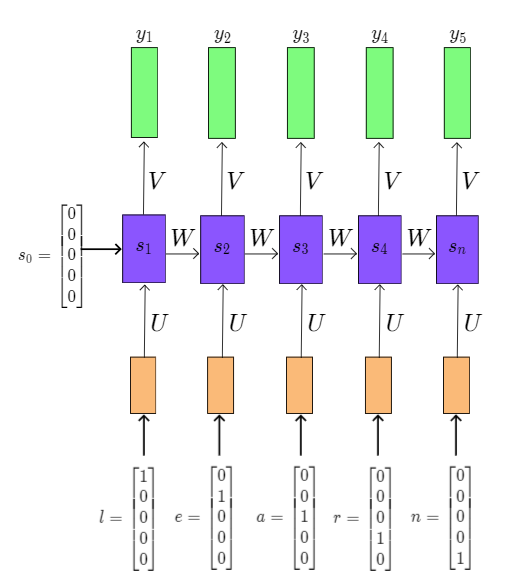

What is the loss value at the first time step i.e, L1(theta)
(Helper: the sum of elements in s1 =0.18)
Note: We haven't used the bias terms of W,U while computing 
​


In [5]:
s0 = np.array([0,0,0,0,0])

In [6]:
s1 = np.tanh(np.dot(U,l)  + np.dot(W,s0) )
y1 = softmax(np.dot(V,s1))

loss_l1 = np.sum(-1 * e * np.log(y1)) 
loss_l1

2.400343465148997

#### Forward Pass

In [7]:
char_arr = np.array(['l','e','a','r','n']).reshape(-1,1)
encoder = OneHotEncoder(categories=[['l','e','a','r','n']],sparse=False)
encoded = encoder.fit_transform(char_arr)
encoded = np.vstack([encoded, np.array([0,0,0,0,0])]) # for end of the word
encoded

/home/ashu/anaconda3/envs/1st_env_test/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

In [46]:
z = dict() # term before applying non-linearity (tanh) in state
state = dict()
y_pred = dict()
state[0] = np.array([0,0,0,0,0])
total_loss = 0
for i in range(1, encoded[0].shape[0]+1):
    x_in = encoded[i-1] # encoded is an array so, 0 based index
    z[i] = np.dot(U,x_in) + np.dot(W, state[i-1])
    state[i] = np.tanh(z[i])
    y_pred[i] = softmax(np.dot(V,state[i]))
    y_true = encoded[i]
    loss = np.sum(-1 * y_true * np.log(y_pred[i]))
    print(f"Loss at step-{i}: ", loss)
    total_loss += loss

print("Total Loss: ", total_loss)

Loss at step-1:  2.400343465148997
Loss at step-2:  4.220610500092558
Loss at step-3:  2.112251296576441
Loss at step-4:  3.548373904970334
Loss at step-5:  0.0
Total Loss:  12.28157916678833


In [47]:

def dw_dw():
    dw = np.zeros((5,5,5,5))
    for i in range(5):
        dw[i][i][i][i] = 1
    return dw

In [44]:
grad_v = np.zeros_like(V)
grad_w = np.zeros_like(W)
grad_u = np.zeros_like(U)
learning_rate = 1
ds_dw_prev = np.zeros((5,5,5))
for i in range(1, encoded[0].shape[0]+1):
    L_wrt_a1 = y_pred[i] - encoded[i-1] 
    
    # calculating gradient wrt V
    grad_v += np.dot(L_wrt_a1.reshape(-1,1), state[i].reshape(1,-1))

    # calculating grad wrt W
    ds_dw = np.dot(dw_dw(), state[i-1].T) + np.dot(ds_dw_prev, W)# multiply non-linearity in next term

    grad_w += np.dot(np.dot(L_wrt_a1, V), (1 - np.square(state[i])) * ds_dw)

    ds_dw_prev = ds_dw

In [45]:
grad_w.sum(), grad_w

(-2.3487630848453502,
 array([[-6.98896832e-01,  7.74096675e-02,  1.11185983e-02,
         -3.88440394e-03,  4.24847444e-02],
        [ 2.84473509e-01,  1.87106894e-01,  4.10303333e-01,
         -6.65343073e-02, -1.30806900e-01],
        [-2.08171161e+00,  2.25932210e-01, -5.34157656e-01,
          3.27929486e-01,  3.17258264e-01],
        [ 1.90655444e-01, -8.32554265e-02,  1.08449774e+00,
          5.56305666e-02, -1.49340748e-01],
        [-4.12311063e+00,  1.31108007e+00, -3.38999034e+00,
          6.95931106e-01,  3.69111414e+00]]))